In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from preprocessing import PreProcess
from overview import Overview

In [4]:
df = pd.read_csv('../data/cleaned_data.csv')

In [28]:
df2 = pd.read_excel("../data/Week1_challenge_data_source.xlsx")

In [6]:
df.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'activity_duration_dl_(ms)', 'activity_duration_ul_(ms)', 'dur._(ms).1',
       'handset_manufacturer', 'handset_type', 'nb_of_sec_with_vol_dl_<_6250b',
       'nb_of_sec_with_vol_ul_<_1250b', 'social_media_dl_(bytes)',
       'social_media_ul_(bytes)', 'google_dl_(bytes)', 'google_ul_(bytes)',
       'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
       'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)',
       'gaming_dl_(bytes)', 'gaming_ul_(bytes)', 'other_dl_(bytes)',


Text(0.5, 0, 'Sample')

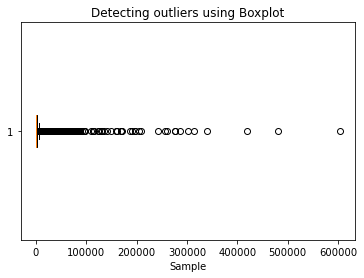

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(df['nb_of_sec_with_vol_ul_<_1250b'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [74]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df['nb_of_sec_with_vol_ul_<_1250b'])
print("Outliers from Z-scores method: ", len(sample_outliers))

Outliers from Z-scores method:  3708


In [77]:

outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df['nb_of_sec_with_vol_ul_<_1250b'])
print("Outliers from IQR method: ", len(sample_outliers))

Outliers from IQR method:  25389


In [82]:
sample = df['nb_of_sec_with_vol_ul_<_1250b']
median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  0          214.0
1         1022.0
2          695.0
3          207.0
4          604.0
           ...  
149996     229.0
149997     102.0
149998     108.0
149999      82.0
150000     217.0
Name: nb_of_sec_with_vol_ul_<_1250b, Length: 150001, dtype: float64
New array:  [ 214. 1022.  695. ...  108.   82.  217.]


Method 3 - Rescaling the data


In [84]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

NameError: name 'b' is not defined

In [87]:
df['nb_of_sec_with_vol_ul_<_1250b'] = [np.log(x) for x in df['nb_of_sec_with_vol_ul_<_1250b']]


Text(0.5, 0, 'Sample')

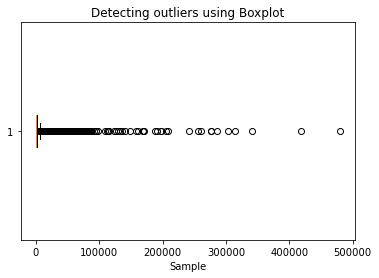

In [89]:
import matplotlib.pyplot as plt
plt.boxplot(df['nb_of_sec_with_vol_ul_<_1250b'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

/home/jedi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


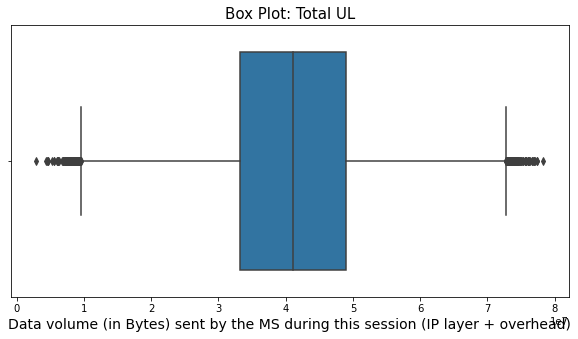

In [9]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df['total_ul_(bytes)'])
plt.title('Box Plot: Total UL', fontsize=15)
plt.xlabel('Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)', fontsize=14)
plt.show()

In [10]:
df.describe()

,bearer_id,start_ms,end_ms,dur._(ms),imsi,msisdn/number,imei,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.00000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.012045e+19,499.188199,498.800888,1.046084e+05,2.082016e+14,4.182441e+10,4.842592e+13,97.774455,15.315031,13299.95768,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.892438e+18,288.610872,288.096693,8.103736e+04,2.144723e+10,2.438731e+12,2.238739e+13,559.909444,76.687998,23971.82300,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.00000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.00000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.00000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368307e+10,8.611970e+13,62.000000,11.000000,19710.00000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.00000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [11]:
#calculate upper and lower limits
upper_limit = df['total_ul_(bytes)'].mean() + 3 * df['total_ul_(bytes)'].std()
lower_limit = df['total_ul_(bytes)'].mean() -3 * df['total_ul_(bytes)'].std()

#select outliers
display(df[~((df['total_ul_(bytes)'] < upper_limit) & (df['total_ul_(bytes)'] > lower_limit))])

#outliers removed
display(df[(df['total_ul_(bytes)'] < upper_limit) & (df['total_ul_(bytes)'] > lower_limit)])

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
4419,1.311448e+19,2019-04-24 08:00:27,693.0,2019-04-25 00:25:03,243.0,59075.0,2.082015e+14,3.365009e+10,3.526021e+13,D74540B,...,4557312.0,91712.0,12259837.0,404950.0,557803005.0,3950587.0,648311234.0,400751.0,6243519.0,584476427.0
5966,1.304243e+19,2019-04-24 11:06:41,11.0,2019-04-25 01:18:42,881.0,51121.0,2.082018e+14,3.363890e+10,3.591571e+13,D88443C,...,15767234.0,1148916.0,3886610.0,3495866.0,298512002.0,313066.0,796845662.0,22444.0,7248354.0,326923653.0
13505,7.349883e+18,2019-04-24 18:19:48,503.0,2019-04-25 00:39:04,703.0,22756.0,2.082003e+14,3.362051e+10,3.569581e+13,T12736C,...,12429341.0,660979.0,10982987.0,510541.0,597148476.0,124554.0,385902024.0,2101782.0,4469240.0,629949264.0
15350,1.304243e+19,2019-04-24 18:53:45,213.0,2019-04-25 00:37:57,769.0,20652.0,2.082015e+14,3.378231e+10,3.566301e+13,D92969C,...,13285220.0,20988305.0,23231657.0,21650146.0,350061114.0,15792667.0,773955089.0,15880966.0,78331311.0,390390788.0
15901,7.349883e+18,2019-04-24 19:03:13,939.0,2019-04-25 02:59:12,441.0,28558.0,2.082017e+14,3.366347e+10,3.585631e+13,D92799A,...,22017697.0,20590565.0,13742934.0,21948653.0,800409956.0,15587551.0,706266755.0,15354227.0,76732208.0,844150389.0
20725,7.277826e+18,2019-04-24 20:12:55,565.0,2019-04-25 00:07:33,672.0,14078.0,2.082021e+14,3.369956e+10,3.577771e+13,L11847A,...,1231799.0,21701832.0,16582494.0,19337726.0,160430857.0,14869663.0,388880674.0,15211788.0,75365046.0,186303124.0
22436,7.349883e+18,2019-04-24 20:34:46,297.0,2019-04-25 03:00:58,781.0,23172.0,2.082019e+14,3.361284e+10,3.553951e+13,D50014C,...,3838943.0,266297.0,17217180.0,1124564.0,800071175.0,447425.0,625768055.0,2169741.0,4658336.0,838044368.0
26313,7.349883e+18,2019-04-23 08:48:32,528.0,2019-04-26 07:01:08,862.0,252756.0,2.082022e+14,3.361257e+10,3.568081e+13,D62041C,...,12814317.0,726861.0,16575342.0,422195.0,411769456.0,1778609.0,117400153.0,1401294.0,6843180.0,454620096.0
26389,7.277826e+18,2019-04-23 09:12:27,842.0,2019-04-26 08:48:31,311.0,257763.0,2.082018e+14,3.366943e+10,3.517151e+13,D79079B,...,21406612.0,1183644.0,7796645.0,696201.0,391946002.0,2436772.0,394264579.0,342643.0,5461287.0,427447047.0
29219,1.311448e+19,2019-04-24 09:48:26,966.0,2019-04-26 08:14:29,879.0,167162.0,2.082009e+14,3.365830e+10,3.518231e+13,D42685C,...,21762255.0,20619678.0,5230817.0,21299696.0,314600331.0,14142706.0,560887770.0,15625409.0,76106710.0,352087447.0


,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [12]:
from scipy.stats import zscore
#create a column with all the zscore values of the MedInc column
df['ZscoreMedInc'] = zscore(df['total_ul_(bytes)'])

#select outliers
display(df[~((df['ZscoreMedInc'] < 3) & (df['ZscoreMedInc'] > -3))])

#outliers removed
display(df[(df['ZscoreMedInc'] < 3) & (df['ZscoreMedInc'] > -3)])

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes),ZscoreMedInc
4419,1.311448e+19,2019-04-24 08:00:27,693.0,2019-04-25 00:25:03,243.0,59075.0,2.082015e+14,3.365009e+10,3.526021e+13,D74540B,...,91712.0,12259837.0,404950.0,557803005.0,3950587.0,648311234.0,400751.0,6243519.0,584476427.0,-3.093005
5966,1.304243e+19,2019-04-24 11:06:41,11.0,2019-04-25 01:18:42,881.0,51121.0,2.082018e+14,3.363890e+10,3.591571e+13,D88443C,...,1148916.0,3886610.0,3495866.0,298512002.0,313066.0,796845662.0,22444.0,7248354.0,326923653.0,-3.003895
13505,7.349883e+18,2019-04-24 18:19:48,503.0,2019-04-25 00:39:04,703.0,22756.0,2.082003e+14,3.362051e+10,3.569581e+13,T12736C,...,660979.0,10982987.0,510541.0,597148476.0,124554.0,385902024.0,2101782.0,4469240.0,629949264.0,-3.250351
15350,1.304243e+19,2019-04-24 18:53:45,213.0,2019-04-25 00:37:57,769.0,20652.0,2.082015e+14,3.378231e+10,3.566301e+13,D92969C,...,20988305.0,23231657.0,21650146.0,350061114.0,15792667.0,773955089.0,15880966.0,78331311.0,390390788.0,3.299847
15901,7.349883e+18,2019-04-24 19:03:13,939.0,2019-04-25 02:59:12,441.0,28558.0,2.082017e+14,3.366347e+10,3.585631e+13,D92799A,...,20590565.0,13742934.0,21948653.0,800409956.0,15587551.0,706266755.0,15354227.0,76732208.0,844150389.0,3.158036
20725,7.277826e+18,2019-04-24 20:12:55,565.0,2019-04-25 00:07:33,672.0,14078.0,2.082021e+14,3.369956e+10,3.577771e+13,L11847A,...,21701832.0,16582494.0,19337726.0,160430857.0,14869663.0,388880674.0,15211788.0,75365046.0,186303124.0,3.036794
22436,7.349883e+18,2019-04-24 20:34:46,297.0,2019-04-25 03:00:58,781.0,23172.0,2.082019e+14,3.361284e+10,3.553951e+13,D50014C,...,266297.0,17217180.0,1124564.0,800071175.0,447425.0,625768055.0,2169741.0,4658336.0,838044368.0,-3.233581
26313,7.349883e+18,2019-04-23 08:48:32,528.0,2019-04-26 07:01:08,862.0,252756.0,2.082022e+14,3.361257e+10,3.568081e+13,D62041C,...,726861.0,16575342.0,422195.0,411769456.0,1778609.0,117400153.0,1401294.0,6843180.0,454620096.0,-3.039826
26389,7.277826e+18,2019-04-23 09:12:27,842.0,2019-04-26 08:48:31,311.0,257763.0,2.082018e+14,3.366943e+10,3.517151e+13,D79079B,...,1183644.0,7796645.0,696201.0,391946002.0,2436772.0,394264579.0,342643.0,5461287.0,427447047.0,-3.162375
29219,1.311448e+19,2019-04-24 09:48:26,966.0,2019-04-26 08:14:29,879.0,167162.0,2.082009e+14,3.365830e+10,3.518231e+13,D42685C,...,20619678.0,5230817.0,21299696.0,314600331.0,14142706.0,560887770.0,15625409.0,76106710.0,352087447.0,3.102566


,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes),ZscoreMedInc
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,-0.387668
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,1.124409
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,-1.173927
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,0.195366
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,-0.228656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,1.463922
149997,7.349883e+18,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,-0.176133
149998,1.311448e+19,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,-0.550622
149999,1.311448e+19,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,-1.019403


In [13]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()


In [20]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  float64
 1   start_ms                        150001 non-null  float64
 2   end_ms                          150001 non-null  float64
 3   dur._(ms)                       150001 non-null  float64
 4   imsi                            150001 non-null  float64
 5   msisdn/number                   150001 non-null  float64
 6   imei                            150001 non-null  float64
 7   avg_rtt_dl_(ms)                 150001 non-null  float64
 8   avg_rtt_ul_(ms)                 150001 non-null  float64
 9   avg_bearer_tp_dl_(kbps)         150001 non-null  float64
 10  avg_bearer_tp_ul_(kbps)         150001 non-null  float64
 11  dl_tp_<_50_kbps_(%)             150001 non-null  float64
 12  50_kbps_<_dl_tp_

,bearer_id,start_ms,end_ms,dur._(ms),imsi,msisdn/number,imei,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),...,youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes),ZscoreMedInc
0,0.988506,0.770771,0.662663,0.980734,0.414307,7.248772e-08,0.355933,0.000433,0.000702,0.000061,...,0.113631,0.352502,0.438681,0.329697,0.866255,0.203620,0.532304,0.448991,0.336846,0.448991
1,0.988506,0.235235,0.606607,0.733164,0.414353,9.163195e-08,0.358701,0.000671,0.000702,0.000042,...,0.868242,0.788437,0.782626,0.721744,0.070697,0.624705,0.909191,0.674934,0.721401,0.674934
2,0.988506,0.001001,0.652653,0.731360,0.414194,1.809066e-07,0.353501,0.000464,0.000702,0.000016,...,0.667798,0.756165,0.280002,0.272198,0.023889,0.486922,0.254587,0.331504,0.304394,0.331504
3,0.988506,0.486486,0.171171,0.709627,0.414303,1.692516e-07,0.354263,0.000464,0.000702,0.000116,...,0.688108,0.601682,0.049878,0.947947,0.655223,0.888074,0.772836,0.536111,0.936439,0.536111
4,0.988506,0.565566,0.954955,0.584100,0.414303,1.119654e-07,0.354774,0.000464,0.000702,0.000016,...,0.861480,0.736250,0.018862,0.625658,0.213165,0.652929,0.840054,0.472752,0.627361,0.472752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0.057471,0.451451,0.214214,0.040000,0.414382,5.631123e-08,0.355547,0.000330,0.000000,0.000138,...,0.534408,0.768887,0.893976,0.624357,0.555426,0.003867,0.814514,0.725666,0.632983,0.725666
149997,0.068966,0.483483,0.187187,0.049038,0.414353,7.077383e-08,0.357346,0.000279,0.000281,0.000061,...,0.376532,0.831935,0.967345,0.743255,0.285950,0.844373,0.148418,0.480600,0.736207,0.480600
149998,0.988506,0.283283,0.810811,0.049189,0.414333,2.367321e-08,0.357962,0.000444,0.000843,0.000114,...,0.084309,0.428386,0.230136,0.656285,0.808894,0.143576,0.683303,0.424642,0.653758,0.424642
149999,0.988506,0.696697,0.327327,0.049006,0.414372,2.110279e-08,0.869979,0.000382,0.000702,0.000090,...,0.377310,0.142835,0.598428,0.417972,0.152754,0.965938,0.084957,0.354594,0.407188,0.354594


MemoryError: Unable to allocate 554. TiB for an array with shape (76125951669885,) and data type float64

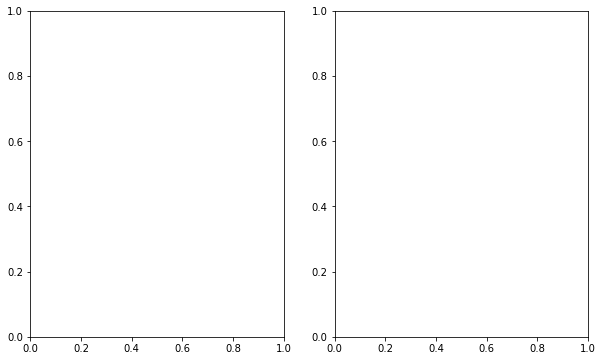

In [15]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
    
num_cols = df.select_dtypes(include=np.number).columns
scaler(df[num_cols])

<AxesSubplot:>

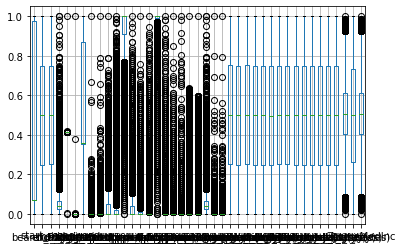

In [21]:
df[num_cols].boxplot()

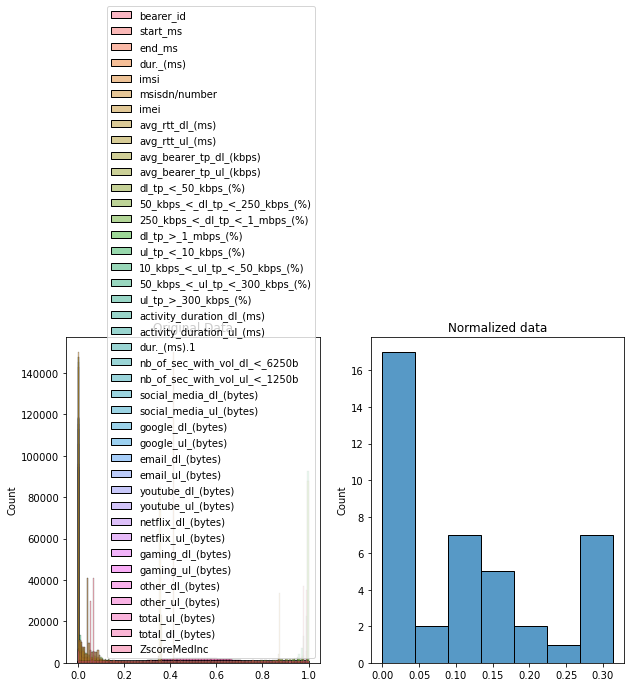

In [22]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(df[num_cols])

<AxesSubplot:>

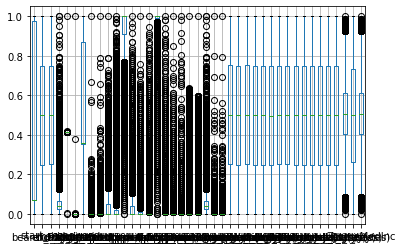

In [23]:
df[num_cols].boxplot()